# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Output File (PNG)
output_png_file = "output)data/CityLatvsTemp.png"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = weather_api_key

In [4]:
# api.openweathermap.org/data/2.5/forecast?q={city name}&appid={API key}

In [5]:
# endpoint:  Url From openweather for API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"    
base_url = f"{base_url}&appid={api_key}&q="
print(base_url)

http://api.openweathermap.org/data/2.5/weather?&appid=de779efdb6112be210b62d8f5b2e2739&q=


In [6]:
# Count for city
Number = 1

# Create lists to hold required items
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

#Loop through each city, extract information and print result
print("Beginning Data Retrieval")
# for city in cities[:5]:
for city in cities:
    
    # do all this if successful
    try: 
        City_Data = requests.get(base_url + city).json()
        Lat.append(City_Data['coord']['lat'])
        Lng.append(City_Data['coord']['lon'])
        Max_Temp.append(City_Data['main']['temp_max'])
        Humidity.append(City_Data['main']['humidity'])
        Cloudiness.append(City_Data['clouds']['all'])
        Wind_Speed.append(City_Data['wind']['speed'])
        Country.append(City_Data['sys']['country'])                
        Date.append(City_Data['dt'])
        City.append(city)
        
        print(f'City number {Number} of {len(cities)} complete | {city}')
        Number = Number + 1
    
    # do all this if unsuccessful
    except KeyError:
#         #City.append(city)
#         #append 'n/a'
#         Lat.append("N/A")
#         Lng.append("N/A")
#         Max_Temp.append("N/A")
#         Humidity.append("N/A")
#         Cloudiness.append("N/A")
#         Wind_Speed.append("N/A")
#         Country.append("N/A")                
#         Date.append("N/A")
        
        print(f'Missing data in city number {Number} of {len(cities)}. | Skipping! {city}')
        Number = Number + 1
       
    time.sleep(1)
        
#Print(City_Data)                   
print('Data Retrieval Completed')           

Beginning Data Retrieval
City number 1 of 605 complete | tasiilaq
City number 2 of 605 complete | cape town
City number 3 of 605 complete | chuy
City number 4 of 605 complete | mahebourg
City number 5 of 605 complete | rikitea
Missing data in city number 6 of 605. | Skipping! meyungs
City number 7 of 605 complete | namatanai
Missing data in city number 8 of 605. | Skipping! agva
City number 9 of 605 complete | cabo san lucas
City number 10 of 605 complete | busselton
City number 11 of 605 complete | jiexiu
City number 12 of 605 complete | krasnovishersk
City number 13 of 605 complete | atuona
City number 14 of 605 complete | esperance
City number 15 of 605 complete | tocopilla
Missing data in city number 16 of 605. | Skipping! dinsor
City number 17 of 605 complete | paungde
City number 18 of 605 complete | namibe
City number 19 of 605 complete | san andres
City number 20 of 605 complete | port alfred
City number 21 of 605 complete | bethel
City number 22 of 605 complete | mormugao
City

City number 185 of 605 complete | shubarkuduk
City number 186 of 605 complete | weligama
City number 187 of 605 complete | avarua
City number 188 of 605 complete | komsomolskiy
City number 189 of 605 complete | mogadishu
City number 190 of 605 complete | iqaluit
Missing data in city number 191 of 605. | Skipping! bolshegrivskoye
Missing data in city number 192 of 605. | Skipping! tidore
Missing data in city number 193 of 605. | Skipping! ruatoria
City number 194 of 605 complete | mana
City number 195 of 605 complete | sovetskiy
City number 196 of 605 complete | uray
City number 197 of 605 complete | port moresby
City number 198 of 605 complete | margate
City number 199 of 605 complete | mbekenyera
City number 200 of 605 complete | broome
City number 201 of 605 complete | fort nelson
Missing data in city number 202 of 605. | Skipping! kadykchan
City number 203 of 605 complete | ayan
City number 204 of 605 complete | acapulco
City number 205 of 605 complete | salaga
Missing data in city 

City number 367 of 605 complete | krasnoarmeyskiy
City number 368 of 605 complete | viedma
City number 369 of 605 complete | asau
City number 370 of 605 complete | hohhot
City number 371 of 605 complete | ramshir
City number 372 of 605 complete | dalvik
City number 373 of 605 complete | buraydah
City number 374 of 605 complete | otavi
City number 375 of 605 complete | kungurtug
City number 376 of 605 complete | houma
City number 377 of 605 complete | santa maria
Missing data in city number 378 of 605. | Skipping! grand river south east
City number 379 of 605 complete | klyuchi
City number 380 of 605 complete | ponyri
City number 381 of 605 complete | flers
City number 382 of 605 complete | vila
City number 383 of 605 complete | sayyan
City number 384 of 605 complete | lisala
City number 385 of 605 complete | severnoye
City number 386 of 605 complete | meulaboh
City number 387 of 605 complete | la orilla
City number 388 of 605 complete | petatlan
City number 389 of 605 complete | lucea


City number 551 of 605 complete | lata
City number 552 of 605 complete | sawakin
City number 553 of 605 complete | ferme-neuve
City number 554 of 605 complete | sorgun
City number 555 of 605 complete | kenai
City number 556 of 605 complete | lang son
Missing data in city number 557 of 605. | Skipping! warqla
City number 558 of 605 complete | galle
City number 559 of 605 complete | shingu
City number 560 of 605 complete | barentu
City number 561 of 605 complete | contamana
City number 562 of 605 complete | northam
Missing data in city number 563 of 605. | Skipping! bargal
City number 564 of 605 complete | winslow
City number 565 of 605 complete | ugoofaaru
City number 566 of 605 complete | kuandian
City number 567 of 605 complete | alexandria
City number 568 of 605 complete | camacha
City number 569 of 605 complete | tateyama
City number 570 of 605 complete | cuamba
City number 571 of 605 complete | saint-georges
City number 572 of 605 complete | kautokeino
City number 573 of 605 comple

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Convert raw data to DataFrame
Weather_dict = {"City": City, "Lat": Lat, "Lng": Lng, "Max_Temp": Max_Temp, "Humidity": Humidity,
                "Cloudiness": Cloudiness, "Wind_Speed": Wind_Speed, "Country": Country, "Date": Date}

Weather_df = pd.DataFrame(Weather_dict)

Weather_df.to_csv('cities.csv',encoding = "utf-8",index = False)
# Weather_dict.count()
#Weather_df                

In [18]:
Weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,270.15,46,0,8.75,GL,1612743022
1,cape town,-33.9258,18.4232,292.15,68,0,6.69,ZA,1612743023
2,chuy,-33.6971,-53.4616,292.35,75,34,3.79,UY,1612742696
3,mahebourg,-20.4081,57.7000,299.15,83,40,3.09,MU,1612743230
4,rikitea,-23.1203,-134.9692,298.49,71,81,5.60,PF,1612743231
...,...,...,...,...,...,...,...,...,...
546,shirokiy,49.7580,129.5230,246.29,88,0,4.43,RU,1612743898
547,kloulklubed,7.0419,134.2556,301.15,83,75,4.63,PW,1612743899
548,zaranj,30.9667,61.8833,281.15,36,0,1.31,AF,1612743901
549,pakpattan,30.3410,73.3866,285.47,41,0,1.66,PK,1612743902


In [19]:
Weather_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,19.706151,17.127757,282.330817,72.749546,50.765880,3.746171,1.612743e+09
std,33.737140,87.536557,17.819636,19.834746,38.636083,2.699564,2.869962e+02
min,-54.800000,-179.166700,234.850000,8.000000,0.000000,0.110000,1.612742e+09
25%,-7.591350,-56.146500,270.370000,64.000000,11.500000,1.685000,1.612743e+09
50%,21.866700,21.516700,288.710000,78.000000,45.000000,3.090000,1.612744e+09
75%,48.665650,90.305750,297.020000,87.000000,90.000000,5.140000,1.612744e+09
max,78.218600,179.316700,305.150000,100.000000,100.000000,20.060000,1.612744e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.   #.loc
humidity_check = Weather_df.loc[Weather_df['Humidity']>100].index
humidity_check

Int64Index([], dtype='int64')

In [21]:
# Create new DataFrame that does not include indicies where humidity is >100
Clean_City_Data = Weather_df.drop(index=humidity_check)
Clean_City_Data.head(10)

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,270.15,46,0,8.75,GL,1612743022
1,cape town,-33.9258,18.4232,292.15,68,0,6.69,ZA,1612743023
2,chuy,-33.6971,-53.4616,292.35,75,34,3.79,UY,1612742696
3,mahebourg,-20.4081,57.7000,299.15,83,40,3.09,MU,1612743230
4,rikitea,-23.1203,-134.9692,298.49,71,81,5.60,PF,1612743231
5,namatanai,-3.6667,152.4333,302.70,68,96,2.19,PG,1612742677
6,cabo san lucas,22.8909,-109.9124,294.26,60,40,3.09,MX,1612743235
7,busselton,-33.6500,115.3333,290.93,99,81,1.34,AU,1612743103
8,jiexiu,37.0244,111.9125,273.60,79,7,0.47,CN,1612743237
9,krasnovishersk,60.4078,57.0820,243.66,86,100,2.90,RU,1612743238


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

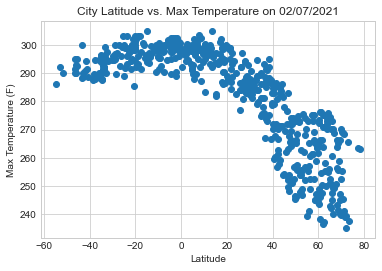

In [22]:
# Build Scatter Plot for Lat and Max Temp
plt.scatter(Clean_City_Data["Lat"], Clean_City_Data["Max_Temp"], marker="o")

# Format Graph
plt.title("City Latitude vs. Max Temperature on 02/07/2021")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("City Lat vs. Temp.png")

plt.show()

## Latitude vs. Humidity Plot

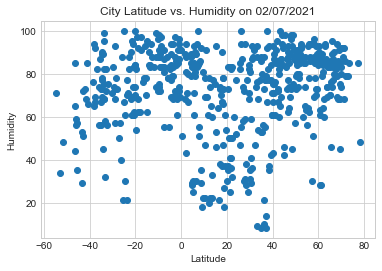

In [23]:
# Build Scatter Plot for Lat and Humidity
plt.scatter(Clean_City_Data["Lat"], Clean_City_Data["Humidity"], marker="o")

# Format Graph
plt.title("City Latitude vs. Humidity on 02/07/2021")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("City Lat vs. Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

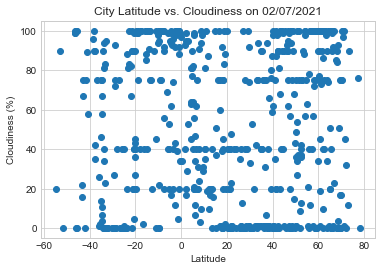

In [24]:
# Build Scatter Plot for Lat and Cloudiness
plt.scatter(Clean_City_Data["Lat"], Clean_City_Data["Cloudiness"], marker="o")
# Format Graph
plt.title("City Latitude vs. Cloudiness on 02/07/2021")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("City Lat vs. Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

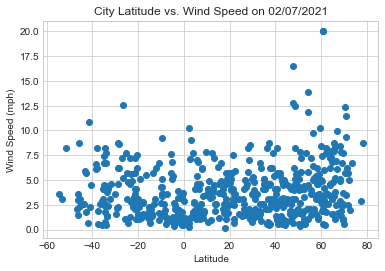

In [25]:
# Build Scatter Plot for Lat and Wind Speed
plt.scatter(Clean_City_Data["Lat"], Clean_City_Data["Wind_Speed"], marker="o")
# Format Graph
plt.title("City Latitude vs. Wind Speed on 02/07/2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("City Lat vs. WindSpeed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
# Seperate plots into Northern and Southern Hemispheres
Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
#Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Northern temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern["Lat"], Northern["Max_Temp"])

# Get regression values
Regress_Values = (Northern["Lat"]) * slope + intercept
Regress_Values

0      255.979825
6      287.930677
8      277.360937
9      259.873656
13     291.226902
          ...    
546    267.838111
547    299.783355
548    281.891189
549    282.359119
550    298.723128
Name: Lat, Length: 374, dtype: float64

In [29]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = -0.75x +305.05'

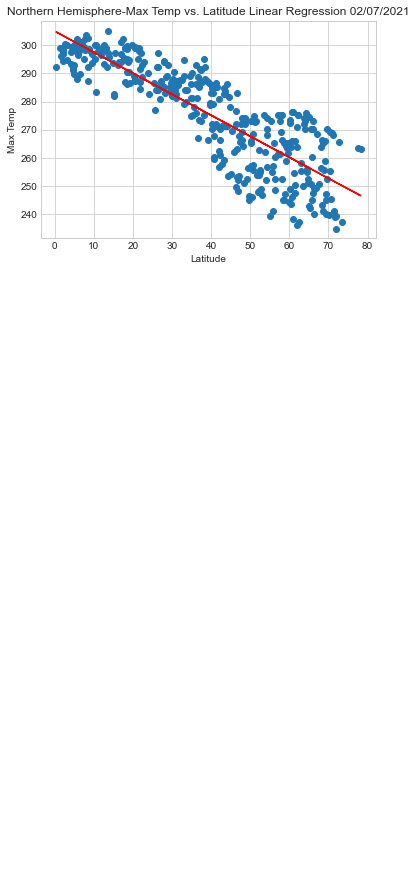

In [30]:
# Create Plot
x_values = Northern["Lat"]
y_values = Northern["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Northern Hemisphere-Max Temp vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Northern: Temp vs. Lat Linear Reg.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
# Seperate plots into Northern and Southern Hemispheres
#Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Southern humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern["Lat"], Southern["Max_Temp"])

# Get regression values
Regress_Values = (Southern["Lat"]) * slope + intercept
Regress_Values

1      293.704790
2      293.744890
3      296.074952
4      295.599402
5      299.010351
          ...    
520    296.149278
523    298.056619
527    297.746219
533    296.532251
539    299.220475
Name: Lat, Length: 177, dtype: float64

In [32]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = 0.18x +299.65'

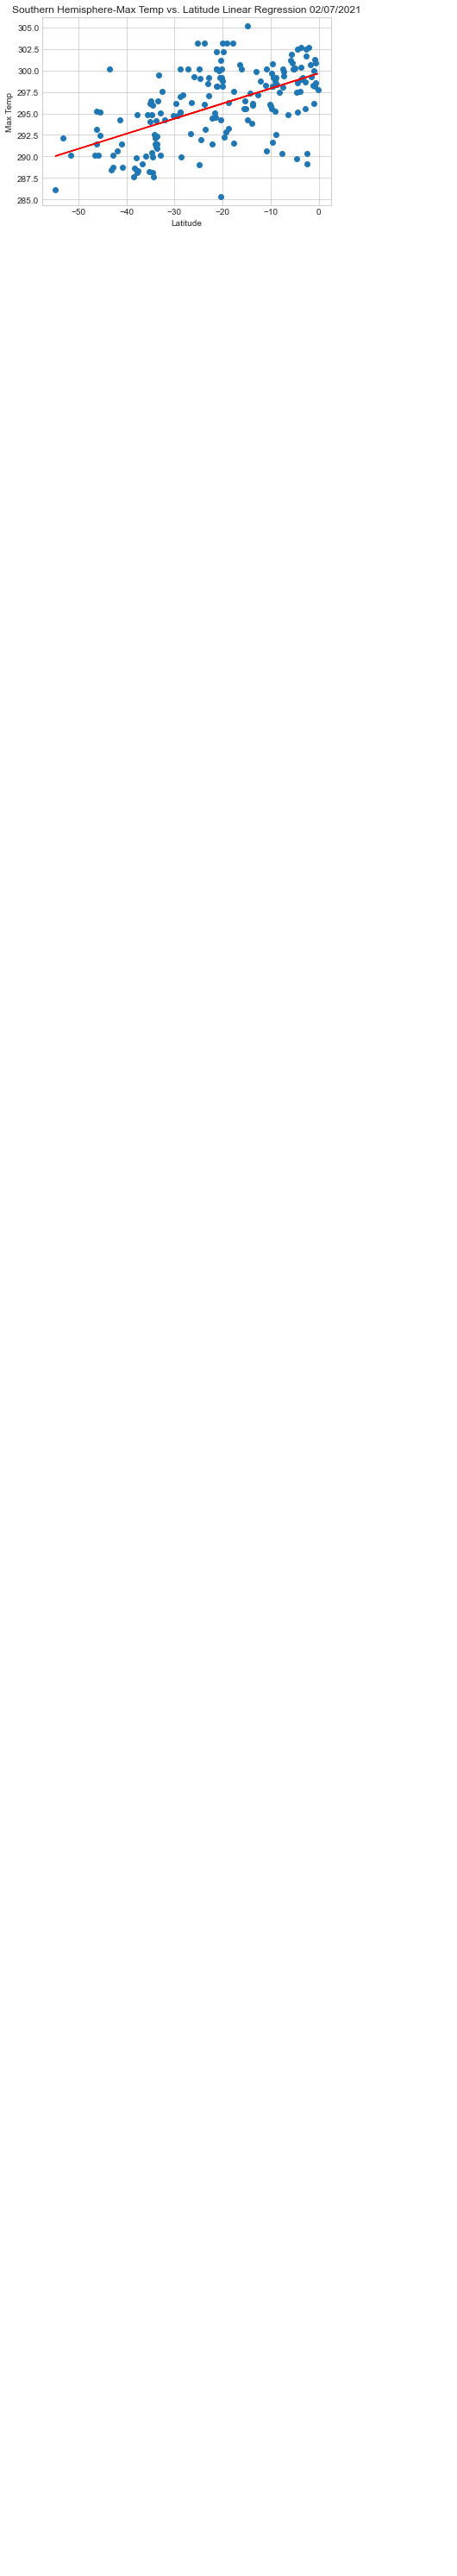

In [33]:
# Create Plot
x_values = Southern["Lat"]
y_values = Southern["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Southern Hemisphere-Max Temp vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Southern Temp vs. Lat Linear Reg.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [34]:
# Seperate plots into Northern and Southern Hemispheres
Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
#Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Northern humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern["Lat"], Northern["Humidity"])

# Get regression values
Regress_Values = (Northern["Lat"]) * slope + intercept
Regress_Values

0      80.316793
6      66.264702
8      70.913309
9      78.604273
13     64.815011
         ...    
546    75.101479
547    61.051855
548    68.920889
549    68.715092
550    61.518146
Name: Lat, Length: 374, dtype: float64

In [35]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = 0.33x +58.74'

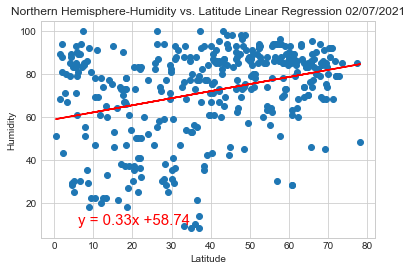

In [36]:
# Create Plot
x_values = Northern["Lat"]
y_values = Northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Northern Hemisphere-Humidity vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Northern Humidity vs. Lat Linear Reg.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [37]:
# Seperate plots into Northern and Southern Hemispheres
#Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Southern humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern["Lat"], Southern["Humidity"])

# Get regression values
Regress_Values = (Southern["Lat"]) * slope + intercept
Regress_Values

1      69.032195
2      69.142870
3      75.573845
4      74.261324
5      83.675548
         ...    
520    75.778984
523    81.043247
527    80.186542
533    76.835989
539    84.255492
Name: Lat, Length: 177, dtype: float64

In [38]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = 0.48x +85.45'

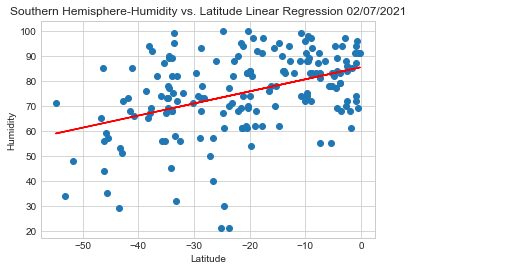

In [39]:
# Create Plot
x_values = Southern["Lat"]
y_values = Southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Southern Hemisphere-Humidity vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Southern Humidity vs. Lat Linear Reg.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [40]:
# Seperate plots into Northern and Southern Hemispheres
Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
#Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Northern Cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern["Lat"], Northern["Cloudiness"])

# Get regression values
Regress_Values = (Northern["Lat"]) * slope + intercept
Regress_Values

0      54.024056
6      43.438255
8      46.940170
9      52.733970
13     42.346166
         ...    
546    50.095226
547    39.511284
548    45.439229
549    45.284197
550    39.862553
Name: Lat, Length: 374, dtype: float64

In [41]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = 0.25x +37.77'

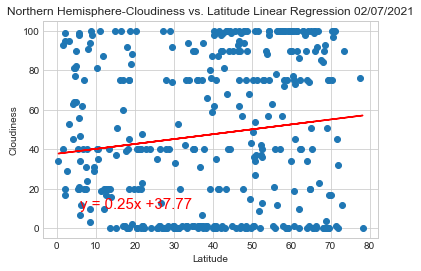

In [42]:
# Create Plot
x_values = Northern["Lat"]
y_values = Northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Northern Hemisphere-Cloudiness vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Northern Cloudiness vs. Lat Linear Reg.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [43]:
# Seperate plots into Northern and Southern Hemispheres
#Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Southern Cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern["Lat"], Southern["Cloudiness"])

# Get regression values
Regress_Values = (Southern["Lat"]) * slope + intercept
Regress_Values

1      48.913953
2      49.072256
3      58.270706
4      56.393361
5      69.858856
         ...    
520    58.564123
523    66.093783
527    64.868408
533    60.075994
539    70.688371
Name: Lat, Length: 177, dtype: float64

In [44]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = 0.69x +72.4'

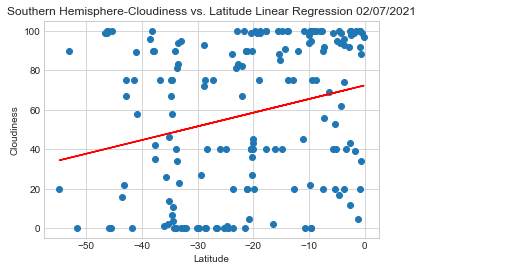

In [45]:
# Create Plot
x_values = Southern["Lat"]
y_values = Southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Southern Hemisphere-Cloudiness vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Southern Cloudiness vs. Lat Linear Reg.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [46]:
# Seperate plots into Northern and Southern Hemispheres
Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
#Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Northern Cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern["Lat"], Northern["Wind_Speed"])

# Get regression values
Regress_Values = (Northern["Lat"]) * slope + intercept
Regress_Values

0      4.713164
6      3.455516
8      3.871561
9      4.559895
13     3.325770
         ...   
546    4.246398
547    2.988971
548    3.693242
549    3.674823
550    3.030704
Name: Lat, Length: 374, dtype: float64

In [47]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = 0.03x +2.78'

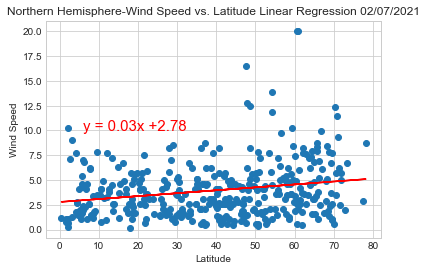

In [48]:
# Create Plot
x_values = Northern["Lat"]
y_values = Northern["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Northern Hemisphere-Wind Speed vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Northern Wind Speed vs. Lat Linear Reg.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [49]:
# Seperate plots into Northern and Southern Hemispheres
#Northern = Clean_City_Data.loc[Clean_City_Data["Lat"]>=0]
Southern = Clean_City_Data.loc[Clean_City_Data["Lat"]<0]

# Perform a linear regression on Northern Cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern["Lat"], Southern["Wind_Speed"])

# Get regression values
Regress_Values = (Southern["Lat"]) * slope + intercept
Regress_Values

1      3.998575
2      3.987183
3      3.325238
4      3.460337
5      2.491324
         ...   
520    3.304123
523    2.762269
527    2.850450
533    3.195325
539    2.431630
Name: Lat, Length: 177, dtype: float64

In [50]:
# Create line equation string
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
Line_Eq

'y = -0.05x +2.31'

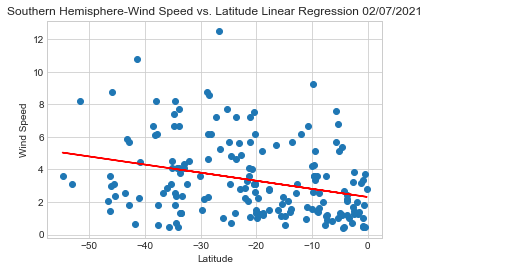

In [52]:
# Create Plot
x_values = Southern["Lat"]
y_values = Southern["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
Regress_Values = x_values * slope + intercept
Line_Eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, Regress_Values, "r-") 
plt.annotate(Line_Eq,(6,10),fontsize=15,color="red")

# Format Graph
plt.title("Southern Hemisphere-Wind Speed vs. Latitude Linear Regression 02/07/2021")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save for homework
plt.savefig("Southern Wind Speed vs. Lat Linear Reg.png")

plt.show()